In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import re
import warnings
from datetime import datetime


warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
city_pop=pd.read_csv('city_pop.csv')
city_pop.set_index('PLACE',inplace=True)
city_pop.head()

,7/1/2010,7/1/2011,7/1/2012,7/1/2013,7/1/2014,7/1/2015,7/1/2016,7/1/2017
PLACE,,,,,,,,
Houston,2099256,2125450,2159824,2198244,2238795,2282235,2304482,2312717
San Antonio,1333413,1357900,1383505,1408910,1435554,1464147,1487738,1511946
Dallas,1200468,1218631,1242035,1258932,1278504,1299793,1322140,1341075
Austin,806463,828700,854350,874910,900621,919974,938200,950715
Fort Worth,748569,764088,781040,796161,814571,834968,855504,874168


In [87]:
df=pd.read_csv('gun_cleaned2.csv')
col=Series(df.columns.values)
df2= df.drop(list(col[col.map(lambda x:x.startswith('part'))]),1)
df3=df2[list(col[col.map(lambda x:x.startswith('n_'))])]
col=['incident_id','date','latitude','longitude','city_or_county']
for i in col:
    df3[i]=df2[i]
df3.head()

,n_killed,n_injured,n_victim,n_suspect,n_victim_male,n_victim_female,n_suspect_male,n_suspect_female,n_suspect_Child,n_suspect_Teen,...,n_victim_Unharmed,n_suspect_Killed,n_suspect_Injured,n_suspect_Unharmed,n_suspect_Arrested,incident_id,date,latitude,longitude,city_or_county
0,1,3,4,1,2,2,2,2,0,0,...,0,0,0,1,0,487891,6/15/2013,29.6754,-95.5499,Houston
1,4,0,4,1,2,2,2,2,0,0,...,0,0,0,0,1,490245,7/1/2013,32.7157,-97.2597,Fort Worth
2,0,4,4,0,4,0,4,0,0,0,...,0,0,0,0,0,491287,7/28/2013,32.8958,-96.8986,Dallas
3,4,4,8,1,5,3,5,3,0,0,...,0,0,0,0,1,491698,8/7/2013,32.6412,-96.9481,Dallas
4,5,0,4,1,4,0,4,0,0,0,...,0,1,0,0,0,480605,9/20/2013,32.2337,-96.4661,Rice


In [4]:
df3_idx_date=df3.copy()
df3_idx_date['date']=pd.to_datetime(df3_idx_date['date'])
df3_idx_date.set_index('date',inplace=True)
df3_idx_date['count']=1

In [5]:
df3_idx_date.sort_index()

,n_killed,n_injured,n_victim,n_suspect,n_victim_male,n_victim_female,n_suspect_male,n_suspect_female,n_suspect_Child,n_suspect_Teen,n_suspect_Adult,n_victim_Child,n_victim_Teen,n_victim_Adult,incident_id,latitude,longitude,city_or_county,count
date,,,,,,,,,,,,,,,,,,,
2013-06-15,1,3,4,1,2,2,2,2,0,0,1,0,0,4.0,487891,29.6754,-95.5499,Houston,1
2013-07-01,4,0,4,1,2,2,2,2,0,0,1,2,0,2.0,490245,32.7157,-97.2597,Fort Worth,1
2013-07-28,0,4,4,0,4,0,4,0,0,0,0,0,0,4.0,491287,32.8958,-96.8986,Dallas,1
2013-08-07,4,4,8,1,5,3,5,3,0,0,1,1,4,3.0,491698,32.6412,-96.9481,Dallas,1
2013-09-20,5,0,4,1,4,0,4,0,0,0,1,3,0,1.0,480605,32.2337,-96.4661,Rice,1
2013-10-09,4,0,4,0,4,0,4,0,0,0,0,0,0,4.0,480981,33.6652,-95.5505,Paris,1
2013-10-27,0,4,4,1,1,0,1,0,0,0,1,0,0,4.0,492427,30.0716,-94.1485,Beaumont,1
2013-11-09,2,16,18,2,4,1,4,1,0,0,2,0,3,2.0,493842,29.8840,-95.7187,Cypress,1
2013-11-15,1,3,4,0,1,0,1,0,0,0,0,0,1,0.0,494033,29.6168,-95.4428,Houston,1


In [6]:
df3_idx_date['count'].resample('Y',kind='period').sum()
# since sample size of 2013 is too small comparing to the other years, we drop 2013 for the following analysis

date
2013      11
2014    3133
2015    3276
2016    3606
2017    2875
2018     676
Freq: A-DEC, Name: count, dtype: int64

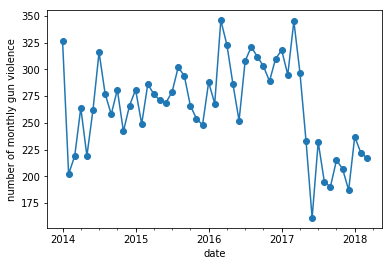

In [28]:
# df4_idx_date starts from date 2014-01-01
df4_idx_date=df3_idx_date.loc['2014-01-01':]
y_count=df4_idx_date['count'].resample('M',kind='period').sum()
y_count.plot(Marker='o')
ylabel('number of monthly gun violence')
show()

date
2014Q1    748
2014Q2    745
2014Q3    851
2014Q4    789
2015Q1    816
2015Q2    817
2015Q3    875
2015Q4    768
2016Q1    902
2016Q2    861
2016Q3    941
2016Q4    902
2017Q1    958
2017Q2    691
2017Q3    617
2017Q4    609
2018Q1    676
Freq: Q-DEC, Name: count, dtype: int64


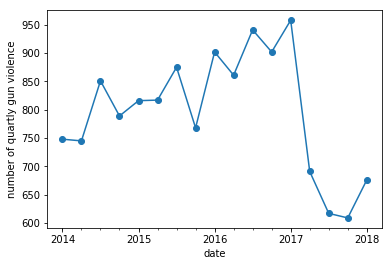

In [30]:
y_count=df4_idx_date['count'].resample('Q',kind='period').sum()
y_count.plot(Marker='o')
print y_count
ylabel('number of quartly gun violence')
show()

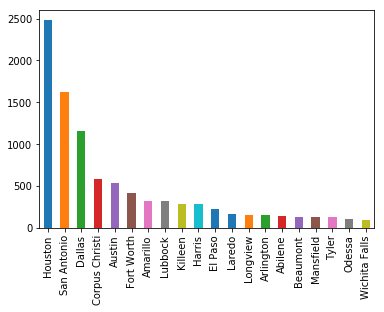

In [46]:
#20140101-201803 total gun violence
df4_idx_date['city_or_county'].value_counts()[:20].plot(kind='bar')

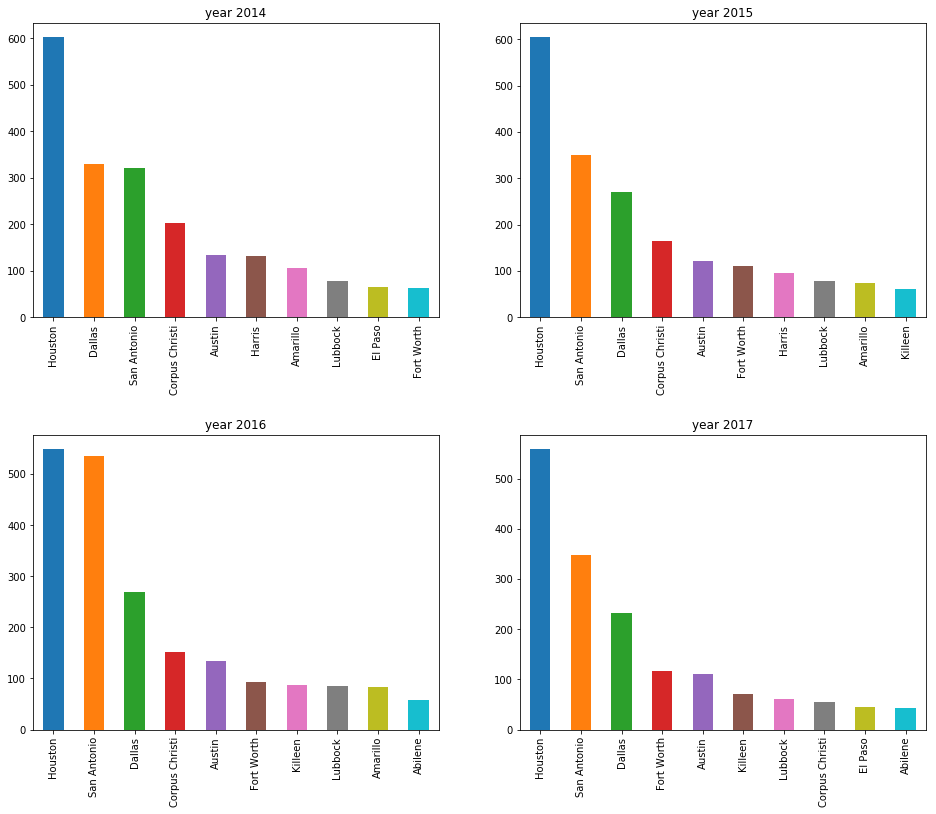

In [65]:
# 2014-2017 each year top10
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,13))
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.subplot(2, 2, 1)
df4_idx_date.loc['2014-01-01':'2014-12-31']['city_or_county'].value_counts()[:10].plot(kind='bar')
title('year 2014')
plt.subplot(2, 2, 2)
df4_idx_date.loc['2015-01-01':'2015-12-31']['city_or_county'].value_counts()[:10].plot(kind='bar')
title('year 2015')
plt.subplot(2, 2, 3)
df4_idx_date.loc['2016-01-01':'2016-12-31']['city_or_county'].value_counts()[:10].plot(kind='bar')
title('year 2016')
plt.subplot(2, 2, 4)
df4_idx_date.loc['2017-01-01':'2017-12-31']['city_or_county'].value_counts()[:10].plot(kind='bar')
title('year 2017')
plt.show()

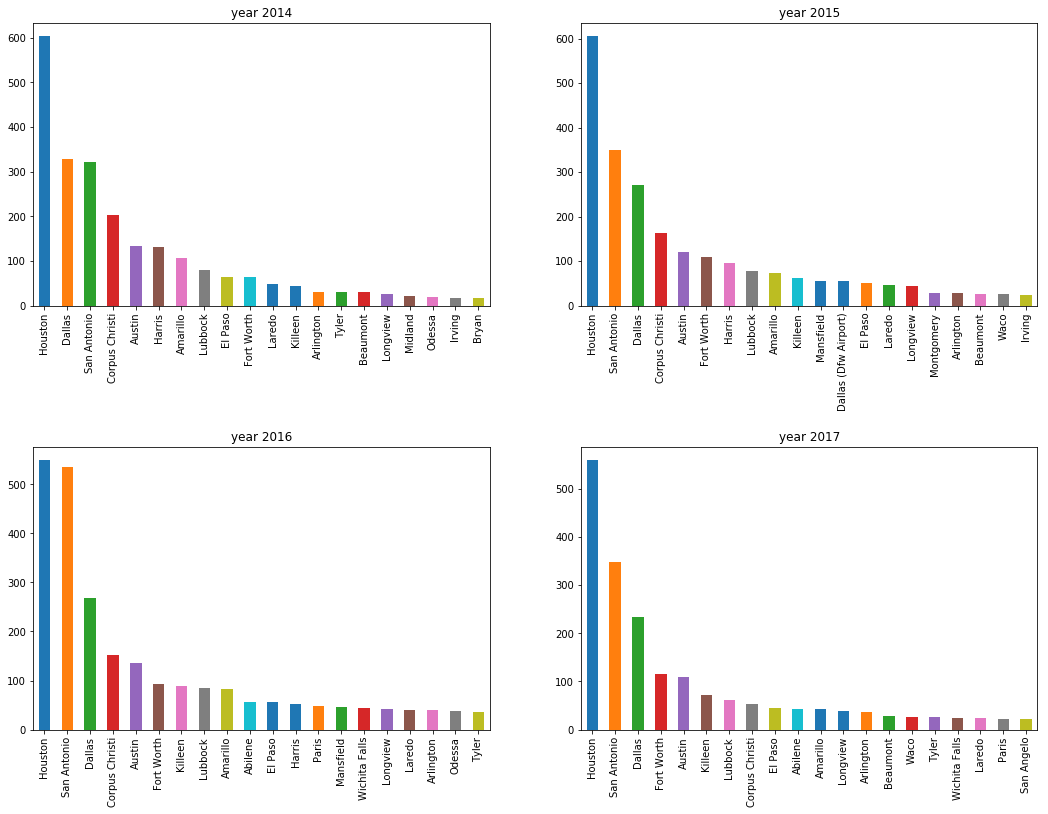

In [61]:
#2014-2018 each year top20
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.subplot(2, 2, 1)
df4_idx_date.loc['2014-01-01':'2014-12-31']['city_or_county'].value_counts()[:20].plot(kind='bar')
title('year 2014')
plt.subplot(2, 2, 2)
df4_idx_date.loc['2015-01-01':'2015-12-31']['city_or_county'].value_counts()[:20].plot(kind='bar')
title('year 2015')
plt.subplot(2, 2, 3)
df4_idx_date.loc['2016-01-01':'2016-12-31']['city_or_county'].value_counts()[:20].plot(kind='bar')
title('year 2016')
plt.subplot(2, 2, 4)
df4_idx_date.loc['2017-01-01':'2017-12-31']['city_or_county'].value_counts()[:20].plot(kind='bar')
title('year 2017')
plt.show()

In [84]:
s_total=df4_idx_date['city_or_county'].value_counts().describe()
s_2014=df4_idx_date.loc['2014-01-01':'2014-12-31']['city_or_county'].value_counts().describe()
s_2015=df4_idx_date.loc['2015-01-01':'2015-12-31']['city_or_county'].value_counts().describe()
s_2016=df4_idx_date.loc['2016-01-01':'2016-12-31']['city_or_county'].value_counts().describe()
s_2017=df4_idx_date.loc['2017-01-01':'2017-12-31']['city_or_county'].value_counts().describe()
df_count_desc=pd.concat([s_total,s_2014,s_2015,s_2016,s_2017],axis=1)
df_count_desc.columns=['20140101_201803','year_2014','year_2015','year_2016','year_2017']
df_count_desc
#df_count_desc=DataFrame(s_total,s_2014,s_2015,s_2016,s_2017)

,20140101_201803,year_2014,year_2015,year_2016,year_2017
count,792.000000,353.000000,364.000000,391.000000,396.000000
mean,17.128788,8.875354,9.000000,9.222506,7.260101
std,119.796292,43.407376,41.788659,43.324998,36.347277
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000
75%,5.000000,3.000000,3.000000,3.000000,3.000000
max,2479.000000,603.000000,605.000000,549.000000,559.000000


In [42]:
city_top50=list(df2['city_or_county'].value_counts()[:50].index.values)
city_pop_50=city_pop.loc[city_top50]


In [43]:
merged=df4_idx_date.reset_index().merge(city_pop_50.reset_index(),left_on='city_or_county',right_on='PLACE')
merged.set_index('date',inplace=True)
merged.head()

,n_killed,n_injured,n_victim,n_suspect,n_victim_male,n_victim_female,n_suspect_male,n_suspect_female,n_suspect_Child,n_suspect_Teen,...,count,PLACE,7/1/2010,7/1/2011,7/1/2012,7/1/2013,7/1/2014,7/1/2015,7/1/2016,7/1/2017
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,0,2,2,1,2,0,2,0,0,0,...,1,Lubbock,230791.0,233610.0,236175.0,239497.0,244205.0,247745.0,251254.0,253888.0
2014-01-01,1,1,1,1,1,0,1,0,0,0,...,1,Lubbock,230791.0,233610.0,236175.0,239497.0,244205.0,247745.0,251254.0,253888.0
2014-01-03,0,0,0,1,0,0,0,0,0,0,...,1,Lubbock,230791.0,233610.0,236175.0,239497.0,244205.0,247745.0,251254.0,253888.0
2014-01-05,0,0,0,1,0,0,0,0,0,0,...,1,Lubbock,230791.0,233610.0,236175.0,239497.0,244205.0,247745.0,251254.0,253888.0
2014-01-06,0,0,4,1,1,0,1,0,0,0,...,1,Lubbock,230791.0,233610.0,236175.0,239497.0,244205.0,247745.0,251254.0,253888.0


In [45]:
place_count=merged['PLACE'].value_counts()
place_pop=merged.groupby('PLACE')['7/1/2017'].mean()
print len(merged) #10909
print len(df4_idx_date)#13566
place_frac=place_count/place_pop
print place_frac.sort_values(ascending=False)[:10]
print place_count.sort_values(ascending=False)[:10]

10909
13566
Montgomery        0.059794
Paris             0.003347
Katy              0.002680
Humble            0.002563
Marshall          0.002113
Lufkin            0.001953
Killeen           0.001938
Longview          0.001889
Corpus Christi    0.001794
Mansfield         0.001770
dtype: float64
Houston           2479
San Antonio       1627
Dallas            1151
Corpus Christi     584
Austin             530
Fort Worth         417
Amarillo           315
Lubbock            312
Killeen            282
Harris             280
Name: PLACE, dtype: int64


In [86]:
len(df.loc[df['city_or_county']=='Austin'])

530

In [ ]:
df4_idx_date.head()